# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Saftana Fitri
- **Email:** saftanafitri25@gmail.com
- **ID Dicoding:** https://www.dicoding.com/users/saftana_fitri_y3kc
- **ID DBS Coding Camp**: MC222D5X0299

## Menentukan Pertanyaan Bisnis

- Kapan saja terjadi lonjakan penyewaan sepeda pada tahun 2011 sampai 2012 dilihat berdasarkan waktu (hour), hari (weekday) dan bulan (month)?
- Pada musim (season) apa jumlah penyewaan sepeda mencapai titik tertinggi dan terendah pada tahun 2011 dan 2012?

## Import Semua Packages/Library yang Digunakan

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Data Wrangling

### Gathering Data

#### Memuat Tabel day

In [92]:
day_df = pd.read_csv('data/day.csv')

In [93]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Memuat Tabel hour

In [94]:
hour_df = pd.read_csv('data/hour.csv')

In [95]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assesing Data

#### Menilai Data day

In [96]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [97]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [98]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [99]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai Data hour

In [100]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [101]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [102]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [103]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ada missing value pada kedua tabel
- Tidak ada duplikasi data pada kedua tabel
- Seharusnya kolom dteday direpresentasikan sebagai tipe data datetime, bukan object.
- Karena seluruh data pada tabel day ada dalam tabel hour maka hanya tabel hour yang akan digunakan.

### Cleaning Data

#### Mengganti Tipe Data dteday

In [104]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [105]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

#### Mengganti Nilai pada Beberapa Kolom

##### Mengganti nilai pada kolom season, yr, holiday, weekday, workingday, and weathersit agar data lebih mudah dibaca.

In [106]:
hour_df['season'] = hour_df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
hour_df['yr'] = hour_df['yr'].replace({0:2011, 1:2012})
hour_df['holiday'] = hour_df['holiday'].replace({0:'No', 1:'Yes'})
hour_df['weekday'] = hour_df['weekday'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
hour_df['workingday'] = hour_df['workingday'].replace({0:'No', 1:'Yes'})
hour_df['weathersit'] = hour_df['weathersit'].replace({1:'Clear', 2:'Cloudy', 3:'Light Rain', 4:'Heavy Rain'})
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,1,0,No,Saturday,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,1,1,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,1,2,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,1,3,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,1,4,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data sudah bersih dan dapat digunakan untuk dianalisis

## Exploratory Data Analysis (EDA)

### Eksplorasi Bike-Sharing-Dataset
Dataset ini berisi informasi peminjaman sepeda berdasarkan faktor-faktor seperti cuaca, musim, suhu, hari, dan faktor-faktor lainnya.

Gambaran umum Bike-Sharing-Dataset

In [107]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379.000000,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,NaN,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,NaN,NaN,No,Saturday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,NaN,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,6.537775,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,4.000000,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,7.000000,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,10.000000,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,12.000000,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**

Dataset mencatat penyewa sepeda selama dua tahun (2011-2012), dengan total 731 hari.
**Fall** menjadi musim dengan jumlah penyewa tertinggi. Cuaca **Clear** adalah kondisi cuaca ketika paling banyak penyewa.

- Jumlah penyewa sepeda berdasarkan bulan (mnth) pada tahun 2011 dan 2012

In [108]:
rent_by_month_year = hour_df.groupby(["mnth", "yr"])["cnt"].sum().unstack()
rent_by_month_year.index = ["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"]
rent_by_month_year

yr,2011,2012
Jan,38189,96744
Feb,48215,103137
Mar,64045,164875
Apr,94870,174224
Mei,135821,195865
Jun,143512,202830
Jul,141341,203607
Agu,136691,214503
Sep,127418,218573
Okt,123511,198841


**Insight:**

Bulan dengan penyewaan tertinggi adalah **September 2012 (218,573 penyewaan)**.

- Jumlah penyewaan sepeda berdasarkan hari (weekday)

In [109]:
rent_by_weekday = hour_df.groupby("weekday")["cnt"].sum().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)
rent_by_weekday

weekday
Monday       455503
Tuesday      469109
Wednesday    473048
Thursday     485395
Friday       487790
Saturday     477807
Sunday       444027
Name: cnt, dtype: int64

**Insight:**

Terlihat bahwa penyewaan sepeda tertinggi ada pada hari **jumat dan kamis**.

- Jumlah penyewa berdasarkan waktu (hr)

In [110]:
rent_by_hour = hour_df.groupby("hr")["cnt"].sum()
rent_by_hour_sorted = rent_by_hour.sort_values(ascending=False)
rent_by_hour_sorted

hr
17    336860
18    309772
8     261001
16    227748
19    226789
13    184919
12    184414
15    183149
14    175652
20    164550
9     159438
7     154171
11    151320
10    126257
21    125445
22     95612
23     63941
6      55132
0      39130
1      24164
2      16352
5      14261
3       8174
4       4428
Name: cnt, dtype: int64

**Insight:**

Berdasarkan data terlihat waktu dengan paling banyak penyewaan adalah dipukul **17-18 dan 8**

- Meng-*clustering* waktu (hr) kepadatan penyewaan sepeda menjadi 3 cluster

In [111]:
hourly_rentals = hour_df.groupby('hr')['cnt'].mean().reset_index()

low_threshold = hourly_rentals['cnt'].quantile(0.33)
high_threshold = hourly_rentals['cnt'].quantile(0.66)

def categorize_rentals(cnt):
    if cnt >= high_threshold:
        return 'high'
    elif cnt >= low_threshold:
        return 'moderate'
    else:
        return 'low'

hourly_rentals['Cluster Name'] = hourly_rentals['cnt'].apply(categorize_rentals)
hourly_rentals_sorted = hourly_rentals.sort_values(by='Cluster Name', ascending=True)

hourly_rentals_sorted

,hr,cnt,Cluster Name
19,19,311.523352,high
18,18,425.510989,high
17,17,461.452055,high
16,16,311.983562,high
15,15,251.233196,high
13,13,253.661180,high
12,12,253.315934,high
8,8,359.011004,high
0,0,53.898072,low
23,23,87.831044,low


**Insight:**
- Cluster high (0) = Penyewaan sepeda tertinggi 
- Cluster moderate (1) = Penyewaan sepeda sedang 
- Cluster low (2) = Penyewaan sepeda terendah 

In [112]:
rush_hour_times = hourly_rentals[hourly_rentals['Cluster Name'] == 'high']['hr'].sort_values().tolist()
rush_hour_times

[8, 12, 13, 15, 16, 17, 18, 19]

**Insight:**

waktu yang masuk dalam cluster high adalah pukul **8, 12, 13, 15, 16, 17, 18, 19**

- Jumlah penyewa berdasarkan musim(season)

In [113]:
rent_by_season = hour_df.groupby(["season", "yr"])["cnt"].sum().unstack()
rent_by_season


yr,2011,2012
season,,
Fall,419650,641479
Spring,150000,321348
Summer,347316,571273
Winter,326137,515476


**Insight:**

Dari data terlihat bahwa :
- Pada musim (season) **gugur (FALL)** jumlah penyewaan sepeda mencapai titik tertinggi dengan jumlah penyewaan pada **tahun 2011** sebanyak **419650 penyewaan** dan **tahun 2012** sebanyak **641479 penyewaan**.
- Pada musim (season) **semi (Summer)** jumlah penyewaan sepeda mencapai titik   terendah dengan jumlah penyewaan pada **tahun 2011** sebanyak **150000 penyewaan** dan **tahun 2012** sebanyak **321348 penyewaan**




## Visualization & Explanatory Analysis

### Pertanyaan 1: Kapan saja terjadi lonjakan penyewaan sepeda pada tahun 2011 sampai 2012 dilihat berdasarkan waktu (hr), hari (weekday) dan bulan (month)?

- Linechart jumlah penyewaan sepeda berdasarkan bulan (mnth) pada tahun 2011-2012

<Figure size 1000x600 with 0 Axes>

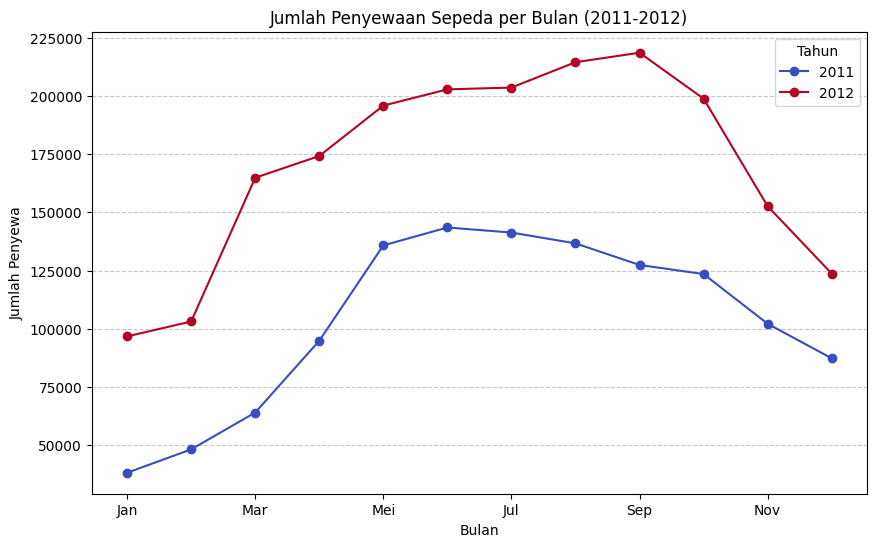

In [114]:
plt.figure(figsize=(10, 6))
rent_by_month_year.plot(kind="line", marker="o", colormap="coolwarm", figsize=(10, 6))

plt.ylabel("Jumlah Penyewa")
plt.xlabel("Bulan")
plt.title("Jumlah Penyewaan Sepeda per Bulan (2011-2012)")

plt.legend(["2011", "2012"], title="Tahun")

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


**Insight:**

Puncak tertinggi penyewaan terjadi pada bulan **September 2012**, lebih tinggi dibandingkan bulan-bulan lainnya pada tahun 2011 sampai 2012.

- Barchart Jumlah Penyewa Sepeda Berdasarkan hari (weekdays)

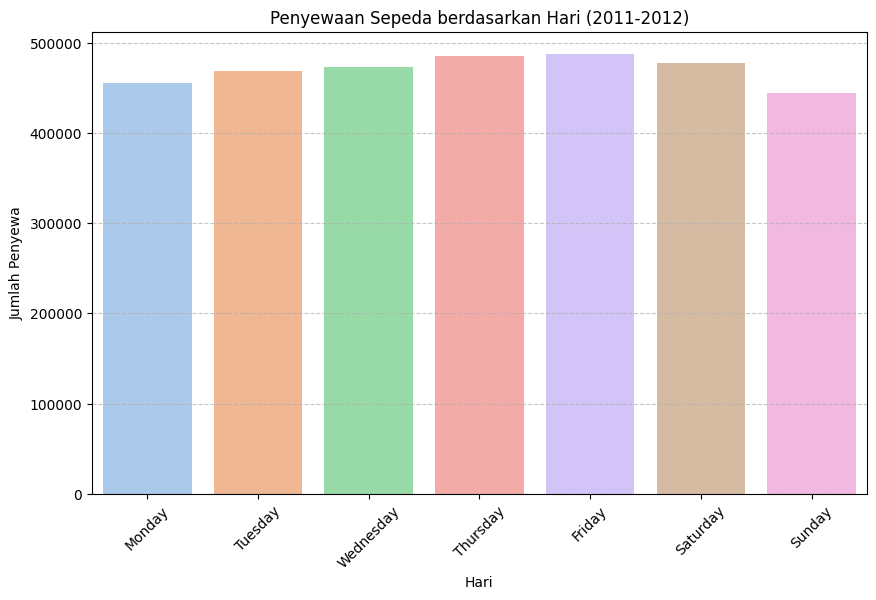

In [115]:
plt.figure(figsize=(10, 6))
sns.barplot(x=rent_by_weekday.index, y=rent_by_weekday.values, hue=rent_by_weekday.index, palette="pastel", legend=False)

plt.xlabel("Hari")
plt.ylabel("Jumlah Penyewa")
plt.title("Penyewaan Sepeda berdasarkan Hari (2011-2012)")

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.show()

**Insight:**

Lonjakan penyewaan sepeda terjadi pada hari **Jumat dan Sabtu**, yang kemungkinan besar terkait dengan aktivitas akhir pekan. Hari **Minggu** memiliki jumlah penyewaan yang lebih rendah dibandingkan hari Sabtu dan Jumat, kemungkinan karena aktivitas berkurang pada akhir pekan menjelang hari kerja. Hari kerja seperti **Senin hingga Kamis** juga memiliki jumlah penyewaan yang cukup tinggi, kemungkinan besar terkait dengan penggunaan sepeda untuk keperluan kerja atau sekolah.

- Barchart jumlah penyewaan sepeda berdasarkan waktu (hr)

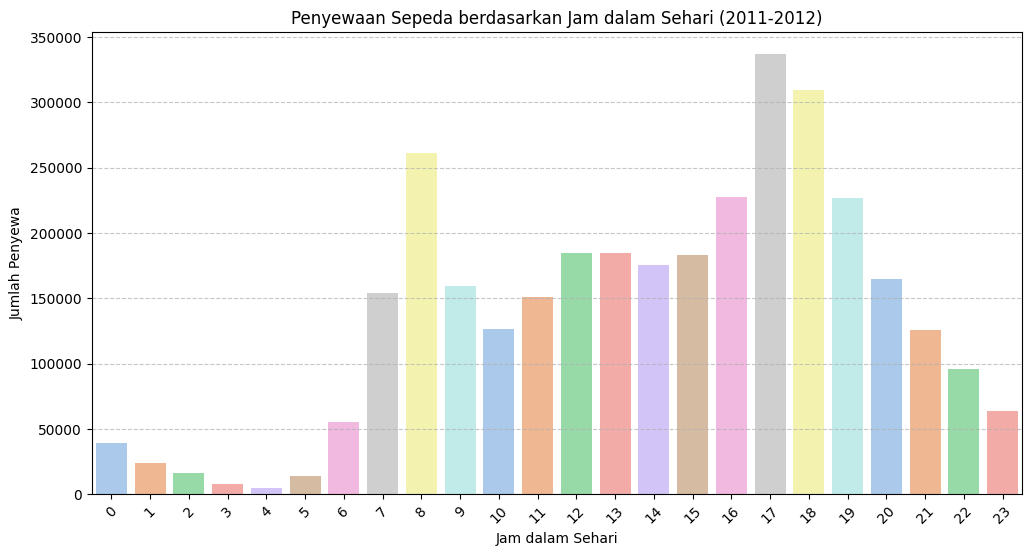

In [116]:
plt.figure(figsize=(12, 6))
sns.barplot(x=rent_by_hour.index, y=rent_by_hour.values, hue=rent_by_hour.index, palette="pastel", legend=False)

plt.xlabel("Jam dalam Sehari")
plt.ylabel("Jumlah Penyewa")
plt.title("Penyewaan Sepeda berdasarkan Jam dalam Sehari (2011-2012)")

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.show()

**Insight:**

Berdasarkan analisis data, puncak penyewaan sepeda terjadi pada **pukul 17 dan 18**, kemungkinan besar karena jam pulang kerja atau sekolah. Lonjakan signifikan lainnya terjadi pada **pukul 8**,kemungkinan besar karena jam berangkat kerja atau sekolah.

- barchart Penyewaan sepeda dengan cluster

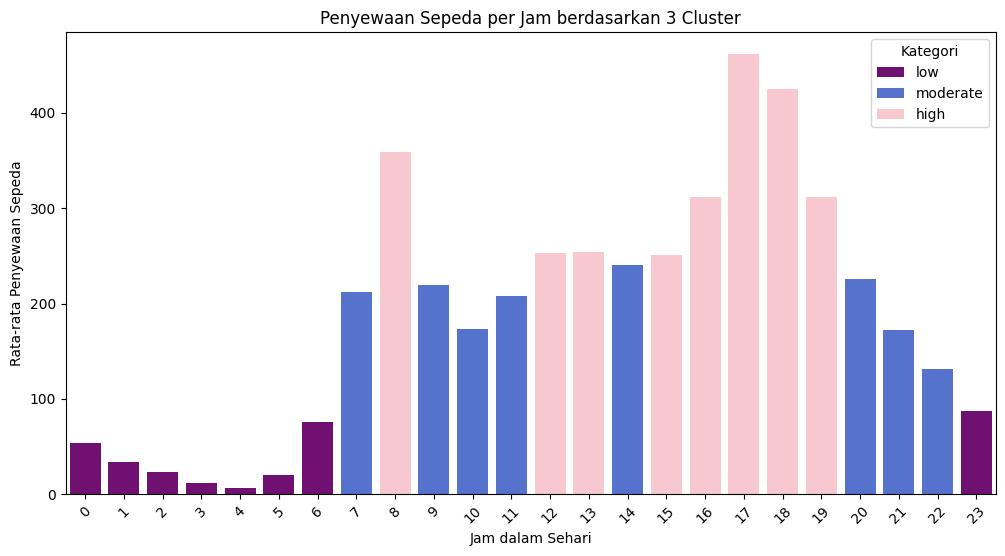

In [117]:
palette_corrected = {
    'low': 'purple',
    'moderate': 'royalblue',
    'high': 'pink'
}

plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_rentals_sorted['hr'], y=hourly_rentals_sorted['cnt'], hue=hourly_rentals_sorted['Cluster Name'], palette=palette_corrected)

plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.title('Penyewaan Sepeda per Jam berdasarkan 3 Cluster')
plt.legend(title='Kategori')
plt.xticks(rotation=45)
plt.show()


 **Insight:**

 Lonjakan penyewaan sepeda terjadi pada jam sibuk yang termasuk dalam Klaster High, yaitu pada **8 pagi, 12-13 siang dan 15-19 sore**. Hal ini menunjukkan pola penggunaan sepeda yang tinggi saat berangkat dan pulang kerja serta istirahat siang.

### Pertanyaan 2:  Pada musim (season) apa jumlah penyewaan sepeda mencapai titik tertinggi dan terendah pada tahun 2011 dan 2012?

- Barchart jumlah Penyewaan Sepeda pada Tahun 2011

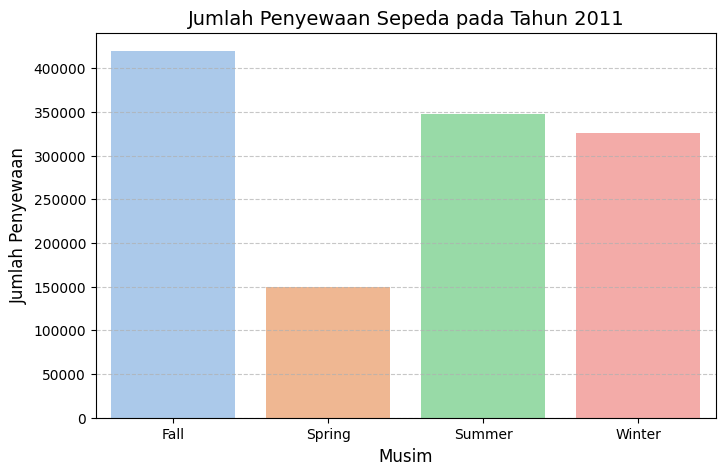

In [118]:
rent_2011 = rent_by_season[2011] 

plt.figure(figsize=(8, 5))
sns.barplot(x=rent_2011.index, y=rent_2011.values, hue=rent_2011.index, palette="pastel", legend=False)

plt.title("Jumlah Penyewaan Sepeda pada Tahun 2011", fontsize=14)
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Jumlah Penyewaan", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

- Barchart jumlah Penyewaan Sepeda pada Tahun 2012

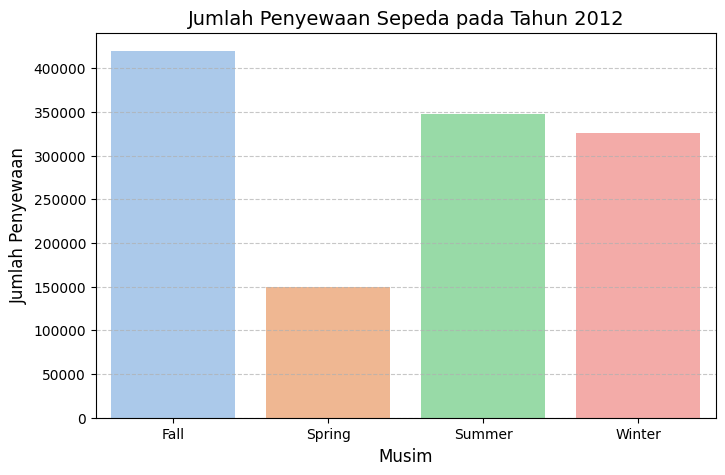

In [119]:
rent_2011 = rent_by_season[2011] 

plt.figure(figsize=(8, 5))
sns.barplot(x=rent_2011.index, y=rent_2011.values, hue=rent_2011.index, palette="pastel", legend=False)

plt.title("Jumlah Penyewaan Sepeda pada Tahun 2012", fontsize=14)
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Jumlah Penyewaan", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

**Musim gugur (Fall)** adalah musim dengan jumlah penyewaan sepeda tertinggi. **Musim semi (Spring)** adalah musim dengan jumlah penyewaan sepeda terendah. **Musim panas(Summer)** dan **musim dingin (Winter)** juga memiliki jumlah penyewaan yang tinggi tetapi tidak sebanyak pada musim gugur (Fall). 

## Conclusion

- Jumlah penyewaan melonjak pada hari **kamis, jumat dan sabtu**. Jumlah penyewaan juga melonjak dibulan **September 2012**. Begitu pun pada jam-jam sibuk seperti **pukul 8 dan 17-18** jumlah penyewaan sepeda melonjak. dan dengan meng-clustering data menjadi 3 cluster berdasarkan jam tingkat penyewaan sepeda teringgi ada pada cluster high yakni pada pukul **8, 12-13, dan 15-19** dengan rata-rata penyewaan **373.89 sepeda/jam**.
- **Musim gugur (Fall) memiliki jumlah penyewaan sepeda tertinggi**, dengan lonjakan signifikan pada tahun 2012 mencapai 641.479 penyewaan. Sebaliknya, **musim semi (Summer)** mencatat jumlah penyewaan terendah, menunjukkan perlunya strategi peningkatan pemakaian di musim tersebut.